
# Building the HAFFA Logo

<svg>
<ellipse style="fill:#00ff00;stroke:#000000;" cx="50" cy="50" rx="48" ry="48">
<ellipse>
</svg>

The HAFFA logo was originally drawn up by Diane Basta and scanned to provide an image file. That image file has been in use for a long time, appearing on club hats, tee-shirts and the club website. However, since the only available image is a bitmap, scaling the logo up for use on banners, or incorporating it in a badge for use on models or membership cards has not been practical. 

<img src="_images/haffa-logo.jpg">

In this note, we will construct an SVG file that can provide the missing functionality. We will use a Python Jupyter notebook so you can see how this new logo is being generated from the original club logo.

## Logo Components

The original logo has five basic elements:

1. The US Flag

2. A heart shape mask used to cut off parts of the flag

3. A Modeler launching an airplane

4. A free-flight  model

5. The text "HAFFA" styled in what looks like the papyrus font

## Tracing the image file

I started off by using **Snagit**, an image editing tool,  to crop off the modeler, airplane and HAFFA text from the image file. The flag and heart are well defined, so there was no need to attempt to process those parts of the logo image. I broke up the text into the three letters used so each could be processed individually.

Once I had isolated those components, I used **Inkscape** to trace the  parts, producing a rough SVG version of each item. **Inkscape** has a "simplify" command that cleans up the SVG somewhat, at the expense of rounding some areas. The resulting vector form of each component was very messy, since the resolution of the images used was fairly low. 

Finally, I then manually edited the images using **Inkscape**, deleting many of the remaining points to smooth up the final SVG for each item. Here are the component files I produced:

### Pilot:

<img src="_images/haffa-pilot.svg">

### Airplane:

<img src="_images/haffa-airplane.svg">

### Letter H:

<img src="_images/haffa-letter-H.svg">

### Letter A:

<img src="_images/haffa-letter-A.svg">

### Letter F:

<img src="_images/haffa-letter-F.svg">

All of these elements stll retain the hand-drawn feel. We may need to tweak them as we build large format images from the final SVG files we produce.

**inkscape** produces SVG that is a bit odd. For most users, this does not matter. However, My goal was to build a clean SVG file for the club logo, so I decided to manually cut out the needed drawing data from the **inkscape** SVG code and use that to produce an SVG file more readable by humans.

The manual step involves extracting path data from each file. Lwt's use a bit of Python to do this job.

## Processing a Basic SVG file

SVG is a text format, based on XML, which uses "tags" to identify each fundamental component of an image. If you have not seen this type of markup before, the idea is pretty simple. Here is a basic "tag":

    <tag optional_parameters>
      tag body
    </tag>
    
Other tags can be placed in the tag body area producing a nested structure. It is common to indent those nested elements for readability.

SVG defines a lot of standard tag names, each performing some action when the image file is displayed. Some tags cause visible drawing effects to appear. Other tags are more administrative in nature.

For instance, the outermost tag in any SVG file is the **svg** tag itself. we will see an example of this in a bit.

We could just type up the SVG file directly, but there are many calculations needed to come up with coordinate values we will need to placing the components of the logo, so I decided to generate the logo file using **Python**. 

SVG files can be processed using a number of tools. One common tool is **lxml** which can be installed using the standard library installer **pip**

Once you run that tool, you can check your installation by importing this library:

In [1]:
import lxml

Let's start off by creating a function that parses an nput file to produce a tree of SVG elements:

First, we need a list of the files to process:

In [53]:
files = [
    'haffa-letter-A.svg',
    'haffa-letter-H.svg',
    'haffa-letter-F.svg',
    'haffa-pilot.svg',
    'haffa-airplane.svg'
]

Next, we create a simple function that will process each file. In one of these files, the coordinates are transformed using a translate command. we need to deal with this case by calculating translate vales for each file:

In [81]:
def clean_svg(path, width, height):
    svg = """<svg width="%s" height="%s">""" % (width, height)
    svg += """<path d="
"""
    for item in path:
        svg += item
        svg += ' '
    svg += """
"
style="fill:black"
/>
</svg>"""
    print(svg)

In [82]:
from lxml import etree

def parse(svg_file):
    with open(svg_file) as fin:
        tree = etree.parse(fin)
    return tree

We can process our files using this function:

In [86]:
for fname in files:
    print("Processing", fname)
    fname = '_images/' + fname
    tree = parse(fname)
    
    for element in tree.iter():
        tag = element.tag.split('}')[1]
        if tag == 'svg':
            width = element.get('width')
            height = element.get('height')
            print("SVG: ", width, height)
        if tag == 'g':
            translate = element.get('transform')
            if translate: 
                transx, transy = translate[10:-1].split(',')
            else:
                transx = 0
                transy = 0
            print('translate', transx, transy)
        elif tag == 'path':
            path = element.get('d')
            items = path.split()
    clean_svg(items, width, height)
            

Processing haffa-letter-A.svg
SVG:  225 200
translate 0 0
<svg width="225" height="200"><path d="
m 12,200 c 15.21925,-1.96221 18.85111,-24.624365 31.04,-33.240902 17.72234,-19.026178 25.80622,-35.790743 41.72545,-29.026727 23.9864,2.391142 63.46746,-2.644427 87.53365,0.182885 17.48003,0.353395 15.27035,-2.498495 18.66824,12.179068 4.54624,14.764069 3.36862,41.153586 14.46025,49.905686 27.68748,6.11092 19.31657,-18.74108 10.62007,-32.9717 -12.18643,-15.456482 -7.8224,-34.349399 -17.79141,-52.575522 -6.64933,-21.9923576 -13.07492,-41.65235 -17.811,-63.262305 -3.25642,-13.892356 -4.24072,-33.351053 -11.88849,-50.241367 -20.09113,5.074658 -21.85777,21.144885 -35.00986,32.893956 -11.15688,20.217178 -31.38122,41.064809 -44.95381,60.0502793 -10.53464,20.9529587 -30.99873,35.7580387 -44.60181,55.2474057 -12.71658,18.269605 -28.51406,33.495229 -44.46513,49.148293 -1.44741,3.48489 9.47969,1.08872 12.47385,1.71095 z m 84.60504,-73.379555 c -24.4462,5.773577 -14.89332,-10.96389 -3.90564,-21.01143

We now have the basic pieces to regenerate a clean SVG file:

If you look closely at this output you see that the **svg** tag contains information about the size of the drawing. The **path** tag details what is to be displayed. 

An SVG path is a list of coordinate control points used to draw a line making up a "path" that a pen will follow t draw the figure. If the path is closed, we can fill it using some color. Let's see what our pilot path looks like:

In [5]:
result = etree.tostring(pilot.getroot(),pretty_print=True, method="xml")
print(result)
    

b'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="300" height="300">\n\n <path d="  m  61.078806,246.98201  1.107051,-29.7141  c  -13.71,6.3 -21.03,10.85 -19.33,22.06  0.81,8.76 -7.00,7.70 -8.32,0.47  -5.69,-8.79 -7.70,-15.34 3.75,-18.16  9.70,-4.86 18.19,-11.39 26.70,-18.02  6.37,-5.31 11.99,-10.47 15.83,-19.39  3.09,-16.40 4.48,-33.11 2.87,-49.74  l  -2.16,-18.45  c  -2.63,-8.55 -18.61,-4.62 -28.43,-5.06  -9.64,1.71 -19.30,3.72 -28.46,7.29  -8.34,-3.39 -22.02,15.15 -22.54,-0.65  1.93,-7.78 13.85,-5.58 20.37,-7.92  7.18,-0.87 14.09,-3.06 21.00,-4.78  9.39,-1.25 18.71,-3.08 28.14,-3.83  6.52,-1.75 6.92,-11.71 6.74,-18.96  C  77.57,77.22 78.05,71.88 74.15,68.10  67.13,64.95 57.85,52.82 66.61,45.95  c  7.81,-5.13 12.98,-2.03 20.80,1.13  -6.03,12.40 9.90,26.11 19.70,14.24  5.32,-9.38 9.02,-19.59 14.66,-28.81  4.44,-7.32 10.90,-18.46 19.36,-19.78  4.30,12.42 -13.78,16.35 -15.02,27.98  -4.5,11.46 -8.79,23.00 -16.12,33.06  -4.91,10.15 -2.02,21.92 -3.

**lxml** can provide the data we need from this structure:

In [9]:
for element in pilot.iter():
    print(element.tag)

{http://www.w3.org/2000/svg}svg
{http://www.w3.org/2000/svg}path


Here we see the two tags in the data file, but they include a namespace in curly brackets. To see just the tags, we could split this out with a bit if text processing. There are only three data items we need in this file: the width and height of the drawing, and the path data contained in the **d** parameter of the **path** tag.

In [6]:
for element in pilot.iter():
    tag = element.tag.split('}')[1]
    if tag == 'svg':
        width = element.get('width')
        height = element.get('height')
        print(width, height)
    elif tag == 'path':
        data = element.get('d')
        print(data)

300 300
  m  61.078806,246.98201  1.107051,-29.7141  c  -13.71,6.3 -21.03,10.85 -19.33,22.06  0.81,8.76 -7.00,7.70 -8.32,0.47  -5.69,-8.79 -7.70,-15.34 3.75,-18.16  9.70,-4.86 18.19,-11.39 26.70,-18.02  6.37,-5.31 11.99,-10.47 15.83,-19.39  3.09,-16.40 4.48,-33.11 2.87,-49.74  l  -2.16,-18.45  c  -2.63,-8.55 -18.61,-4.62 -28.43,-5.06  -9.64,1.71 -19.30,3.72 -28.46,7.29  -8.34,-3.39 -22.02,15.15 -22.54,-0.65  1.93,-7.78 13.85,-5.58 20.37,-7.92  7.18,-0.87 14.09,-3.06 21.00,-4.78  9.39,-1.25 18.71,-3.08 28.14,-3.83  6.52,-1.75 6.92,-11.71 6.74,-18.96  C  77.57,77.22 78.05,71.88 74.15,68.10  67.13,64.95 57.85,52.82 66.61,45.95  c  7.81,-5.13 12.98,-2.03 20.80,1.13  -6.03,12.40 9.90,26.11 19.70,14.24  5.32,-9.38 9.02,-19.59 14.66,-28.81  4.44,-7.32 10.90,-18.46 19.36,-19.78  4.30,12.42 -13.78,16.35 -15.02,27.98  -4.5,11.46 -8.79,23.00 -16.12,33.06  -4.91,10.15 -2.02,21.92 -3.54,32.97  -0.17,20.91 1.25,42.61 -1.42,63.36  -2.64,12.37 -10.05,23.13 -19.93,30.88  -10.40,7.79 -13.412148,16.65364

the path data is easily split up into a list of items:

In [8]:
items = data.split()
for item in items:
    print(item)

m
61.078806,246.98201
1.107051,-29.7141
c
-13.71,6.3
-21.03,10.85
-19.33,22.06
0.81,8.76
-7.00,7.70
-8.32,0.47
-5.69,-8.79
-7.70,-15.34
3.75,-18.16
9.70,-4.86
18.19,-11.39
26.70,-18.02
6.37,-5.31
11.99,-10.47
15.83,-19.39
3.09,-16.40
4.48,-33.11
2.87,-49.74
l
-2.16,-18.45
c
-2.63,-8.55
-18.61,-4.62
-28.43,-5.06
-9.64,1.71
-19.30,3.72
-28.46,7.29
-8.34,-3.39
-22.02,15.15
-22.54,-0.65
1.93,-7.78
13.85,-5.58
20.37,-7.92
7.18,-0.87
14.09,-3.06
21.00,-4.78
9.39,-1.25
18.71,-3.08
28.14,-3.83
6.52,-1.75
6.92,-11.71
6.74,-18.96
C
77.57,77.22
78.05,71.88
74.15,68.10
67.13,64.95
57.85,52.82
66.61,45.95
c
7.81,-5.13
12.98,-2.03
20.80,1.13
-6.03,12.40
9.90,26.11
19.70,14.24
5.32,-9.38
9.02,-19.59
14.66,-28.81
4.44,-7.32
10.90,-18.46
19.36,-19.78
4.30,12.42
-13.78,16.35
-15.02,27.98
-4.5,11.46
-8.79,23.00
-16.12,33.06
-4.91,10.15
-2.02,21.92
-3.54,32.97
-0.17,20.91
1.25,42.61
-1.42,63.36
-2.64,12.37
-10.05,23.13
-19.93,30.88
-10.40,7.79
-13.412148,16.65364
-13.81,31.28
0.53,10.38
-1.62,20.31
-0.50,

most of these items are coordinate pairs. The items that are simple leters are SVG drawing commands. To understand them, we need to examine what each command does.

SVG uses a basic dimensionless coordinate system. Normally, these dimensions refer to pixels on a screen, but we can make them dimensional with a little work. The **x** coordinate runs left to right. The **y** coordinate runs from top to bottom, which is a little odd for humans. The drawing commands move a virtual pen around in this space, and may define a line of simply move the pen frm place to place leaving no line. In out output we only see a few of the available SVG drawing commands. These commands may be upper case, or lower case. If they are upper case, the coordinates needed are absolute. If they are lower case, the provided coordinates are relative to the last point drawn. In our file, most commands are relative, so the coordinates shown are not the final values. We need to do some math to get the actual drawing coordinates. Here are the commands we see here:

1. **m** - move the pen to the specified coordinate (since we start off at 0,0, the provide coordinates are actually absolute values

2. **c** - draw a bezier curve. The final coordinate and two control points are specified.

3. **l** draw a straight line from the last point specified  to the next coordinate.

4. **z** - close the current path by drawing a straight line from the last point specified to the first point in the path. The resulting area can be filled. The fill color is specified by the **style** paramener.

If a command is followed by more coordite values than the command needs, the same command is implied. This continues until another literal command letter is seen.

Let's set up a function to process a path using some simple methods to handle each command:

In [51]:
x = 0
y = 0
i = 0
xmin = 5000
ymin = 5000
xmax = -5000
ymax = -5000

numitems = len(items)
command = ''

def split_coord(cstr):
    x,y = cstr.split(',')
    x = float(x)
    y = float(y)
    return x,y

def move(i, relative):
    global x,y, newpath
    
    dx,dy = split_coord(items[i])
    if relative:
        x += dx
        y += dy
    else:
        x = dx
        y = dy
    xs = "%.2f" % x
    ys = "%.2f" % y
    newpath.extend([xs,ys])
    return 1
            
def curve(i, relative):
    global x, y, newpath
    cx1,cy1 = split_coord(items[i])
    cx2,cy2 = split_coord(items[i+1])
    cx3,cy3 = split_coord(items[i+2])
    if relative:
        cx1 = x + cx1
        cy1 = y + cy1
        cx2 = x + cx2
        cy2 = y + cy2
        x += cx3
        y += cy3
    else:
        x = cx3
        y = cy3
    cx1 = "%.2f" % cx1
    cy1 = "%.2f" % cy1
    cx2 = "%.2f" % cx2
    cy2 = "%.2f" % cy2
    xs = "%.2f" % x
    ys = "%.2f" % y
    newpath.extend([cx1,cy1,cx2,cy2,xs,ys])
    return 3

def close(i, relative):
    return 1
    
def commands(argument, i):
    relative = argument.islower()
    switcher = {
        'm' : move,
        'M' : move,
        'c' : curve,
        'C' : curve,
        'l' : move,
        'L' : move,
        'z' : close,
        'Z' : close,
    }
    func = switcher.get(argument, lambda: "Invalid command")
    return func(i, relative)
    
def gen_svg(xmax, ymax, path):
    svg = """<svg xmlns="http://www.w3.org/2000/svg"
xmlns:xlink="http://www.w3.org/1999/xlink"
width="%d" height="%d">
<path d="
"""% (xmax, ymax)
    for item in path:
        svg += str(item)
        svg += " "
    svg += """
    "
    style="fill:#000000"
  />
</svg>
"""   
    print(svg)

newpath = []
while i < numitems:
    command = items[i]
    i += 1
    newpath.append(command.upper())
    done = False
    while not done:
        i += commands(command,i)
        if x > xmax: xmax = x
        if y > ymax: ymax = y
        if x < xmin: xmin = x
        if y < ymin: ymin = y
            
        done = i >= numitems or  items[i].isalpha()
gen_svg(xmax, ymax, newpath)
        

<svg xmlns="http://www.w3.org/2000/svg"
xmlns:xlink="http://www.w3.org/1999/xlink"
width="141" height="275">
<path d="
M 61.08 246.98 62.19 217.27 C 48.48 223.57 41.16 228.12 42.86 239.33 43.67 248.09 35.86 247.03 34.54 239.80 28.85 231.01 26.84 224.46 38.29 221.64 47.99 216.78 56.48 210.25 64.99 203.62 71.36 198.31 76.98 193.15 80.82 184.23 83.91 167.83 85.30 151.12 83.69 134.49 L 81.53 116.04 C 78.90 107.49 62.92 111.42 53.10 110.98 43.46 112.69 33.80 114.70 24.64 118.27 16.30 114.88 2.62 133.42 2.10 117.62 4.03 109.84 15.95 112.04 22.47 109.70 29.65 108.83 36.56 106.64 43.47 104.92 52.86 103.67 62.18 101.84 71.61 101.09 78.13 99.34 78.53 89.38 78.35 82.13 C 77.57 77.22 78.05 71.88 74.15 68.10 67.13 64.95 57.85 52.82 66.61 45.95 C 74.42 40.82 79.59 43.92 87.41 47.08 81.38 59.48 97.31 73.19 107.11 61.32 112.43 51.94 116.13 41.73 121.77 32.51 126.21 25.19 132.67 14.05 141.13 12.73 145.43 25.15 127.35 29.08 126.11 40.71 121.61 52.17 117.32 63.71 109.99 73.77 105.08 83.92 107.97 95.69 10

In [14]:
itemnum = 0
numitems = len(items)

def curve(argument):
    print("C")
    for n in range(1,4):
        print(items[itemnum + n]," ",)
    
    
def move(argument):
    print("M")
    
def line(argument):
    print("L")
    
    
def close(argument):
    print('Z')
    
def commands(argument):
    switcher = {
        'm' : move,
        'M' : move,
        'c' : curve,
        'C' : curve,
        'l' : line,
        'L' : line,
        'z' : close,
        'Z' : close,
    }
    func = switcher.get(argument, lambda: "Invalid command")
    func(argument)
    
for item in items:
    if item.isalpha():
        commands(item)

M
C
61.078806,246.98201  
1.107051,-29.7141  
c  
L
C
61.078806,246.98201  
1.107051,-29.7141  
c  
C
61.078806,246.98201  
1.107051,-29.7141  
c  
C
61.078806,246.98201  
1.107051,-29.7141  
c  
Z
M
C
61.078806,246.98201  
1.107051,-29.7141  
c  
Z


In [31]:

width = 1000
height = 1000

svg = drawSvg.Drawing(1000, 1000, origin="center")

# Draw an irregular polygon
svg.append(draw.Lines(0, 0,
                    500, 0,
                    500, 500,
                    0, 500,
                    close=True,
            fill="yellow",
            stroke="black",
            stroke_width="5"))

We could display this directly, but looking at the generated SVG will be handy for debugging the work we are going to do.

Here is how we generate an SVG file from this test code"

In [32]:
svg.saveSvg("_images/test1.svg")

We can create a simple python function to display our SVG files.

In [33]:
def show(filename):
    with open('_images/%s' % filename) as fin:
        lines = fin.readlines()
    for l in lines:
        print(l.rstrip())

In [29]:
show("test1.svg")

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="1000" height="1000" viewBox="0 -1000 1000 1000">
<defs>
</defs>
<path d="M0,0 L500,0 L500,-500 L0,-500 Z" fill="yellow" stroke="black" stroke-width="5" />
</svg>


the **drawSvg** package is doing a trick here. SVG uses a second concept, the **viewport** to set up a world coordinate system that we will look through to see our actual image. In this example code, the **viewport** is being set up so we can think of our drawing coordinates in more normal (for humans) coordinates with **y** moving up. If you look at the coordinates used in the **draw.Lines** function pairs are pairs of values defining an **x**,**y** point. The first point starts the drawing, and lines are drawn between each next point and the previous point specified. That gives three sides for the example box. The final side is created by "closing" the polygon. The entire box is filled using a color code (yellow in this case) specified on the **fill** parameter. 

Here is the image we created:

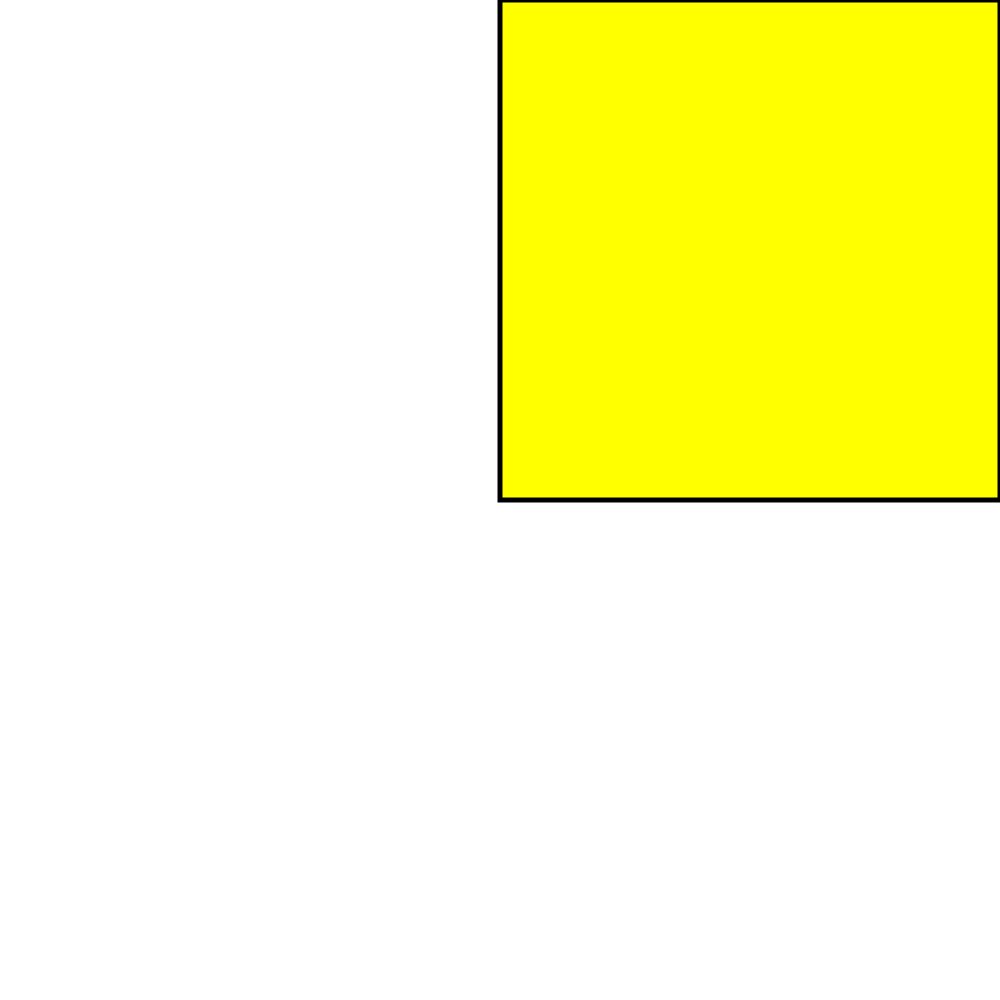

In [34]:
svg

The image is scaled to fit the screen, but represents a normal piece of paper. There is a lot of extra space shown, but this image is showing an entire piece of paper, scaled to fit the width of the screen. We can eliminate all the blank space for testing by lowering the size of the drawing area. Since one of the goals of this effort is to produce a circluar badge containing the logo, we will switch to a square drawing canvas for future tests.


### Examining the test svg code

SVG code is based on XML and looks a lot like HGTML as well. That means it is based on blocks of code enclosed between "tags"

Tags in SVG are names surrounded by angle brackets. Each defined tag specifies some kind of graphics component. These components may actually produce visible drawing elements, but othere are more administrative in nature.

Each tag appear in two forms:  there is an "open" tag and a "close" tag. The difference is that the name of the tag begins with a slash on the "close tag. Between these two tags, other SVG code will be contained. It is important that tags "nest' properly. You cannot start a tag inside of another tag pair and not close it before the outer closing tag.

The open tag can contain a set of parameters, which are space separqted parameter. Each parameter has a name followed by an equal sign, then the parameter value in quotes. The available parameters depend on the tag being used. 

The most important tag is the **svg** tag, which surrounds all code needed to produce a single image. The parameters in that **svg** tag set up the canvas and coordinate systems we will use. 

There is an empty set of tags named **def** that are not being used in this example. Finally, the box is displayed by defining the **path** to be drawn. The commands that actually draw the box are coded inside the string assigned to the parameter **d**. The individual SVG commands are simple to understand. but there are sev3ral of them available.

1. **M** - mve a pen from wherever it is now to the specified coordinate. The pen is "up", meaning nothing is being drawn.

2. **L** - draw  linw from the previous position to the indicated coordinate. In this case a straight line id drawn. The color of the lne and the size of the pen are controlled by the **stroke** and **stroke-width** parameters.

3. **Z** - this colses a polygon drawn as a series of stratght lines. The final line will run from the last point specified to the first point specified. This should create a closed area suitable for "filling" with some color. 

## Creating a US Flag

The geometry of the US Flag is well defined. Basically, it is a simple rectangle with the width 1.9 times the height. We will place thirteen equal height stripes on this rectangle. If we start off with each stripe set to 100 high, then the flag dimensions are:

In [7]:
stripe_height = 100
flag_height = 13 * stripe_height
flag_width = 1.9 * flag_height

print(flag_width, flag_height)

2470.0 1300


The basic flag rectangle can now be set up:

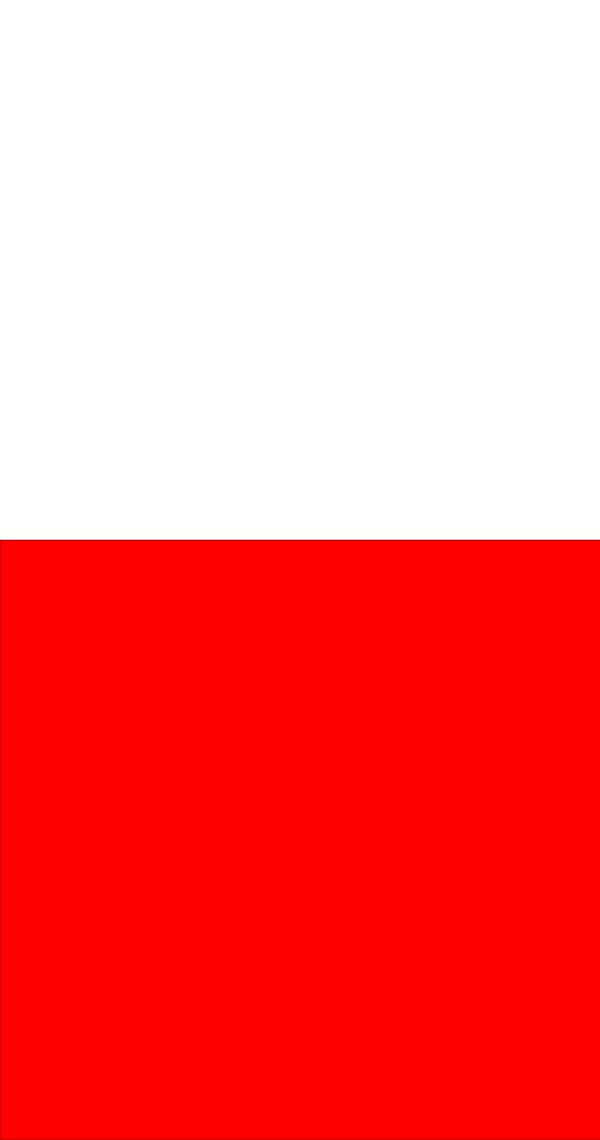

In [8]:
flag = draw.Drawing(flag_height, flag_width)

# Draw an irregular polygon
flag.append(draw.Lines(0, 0,
                    flag_width, 0,
                    flag_width, flag_height,
                    0, flag_height,
                    close=True,
            fill='red',
            stroke='black'))
flag.setRenderSize(600)

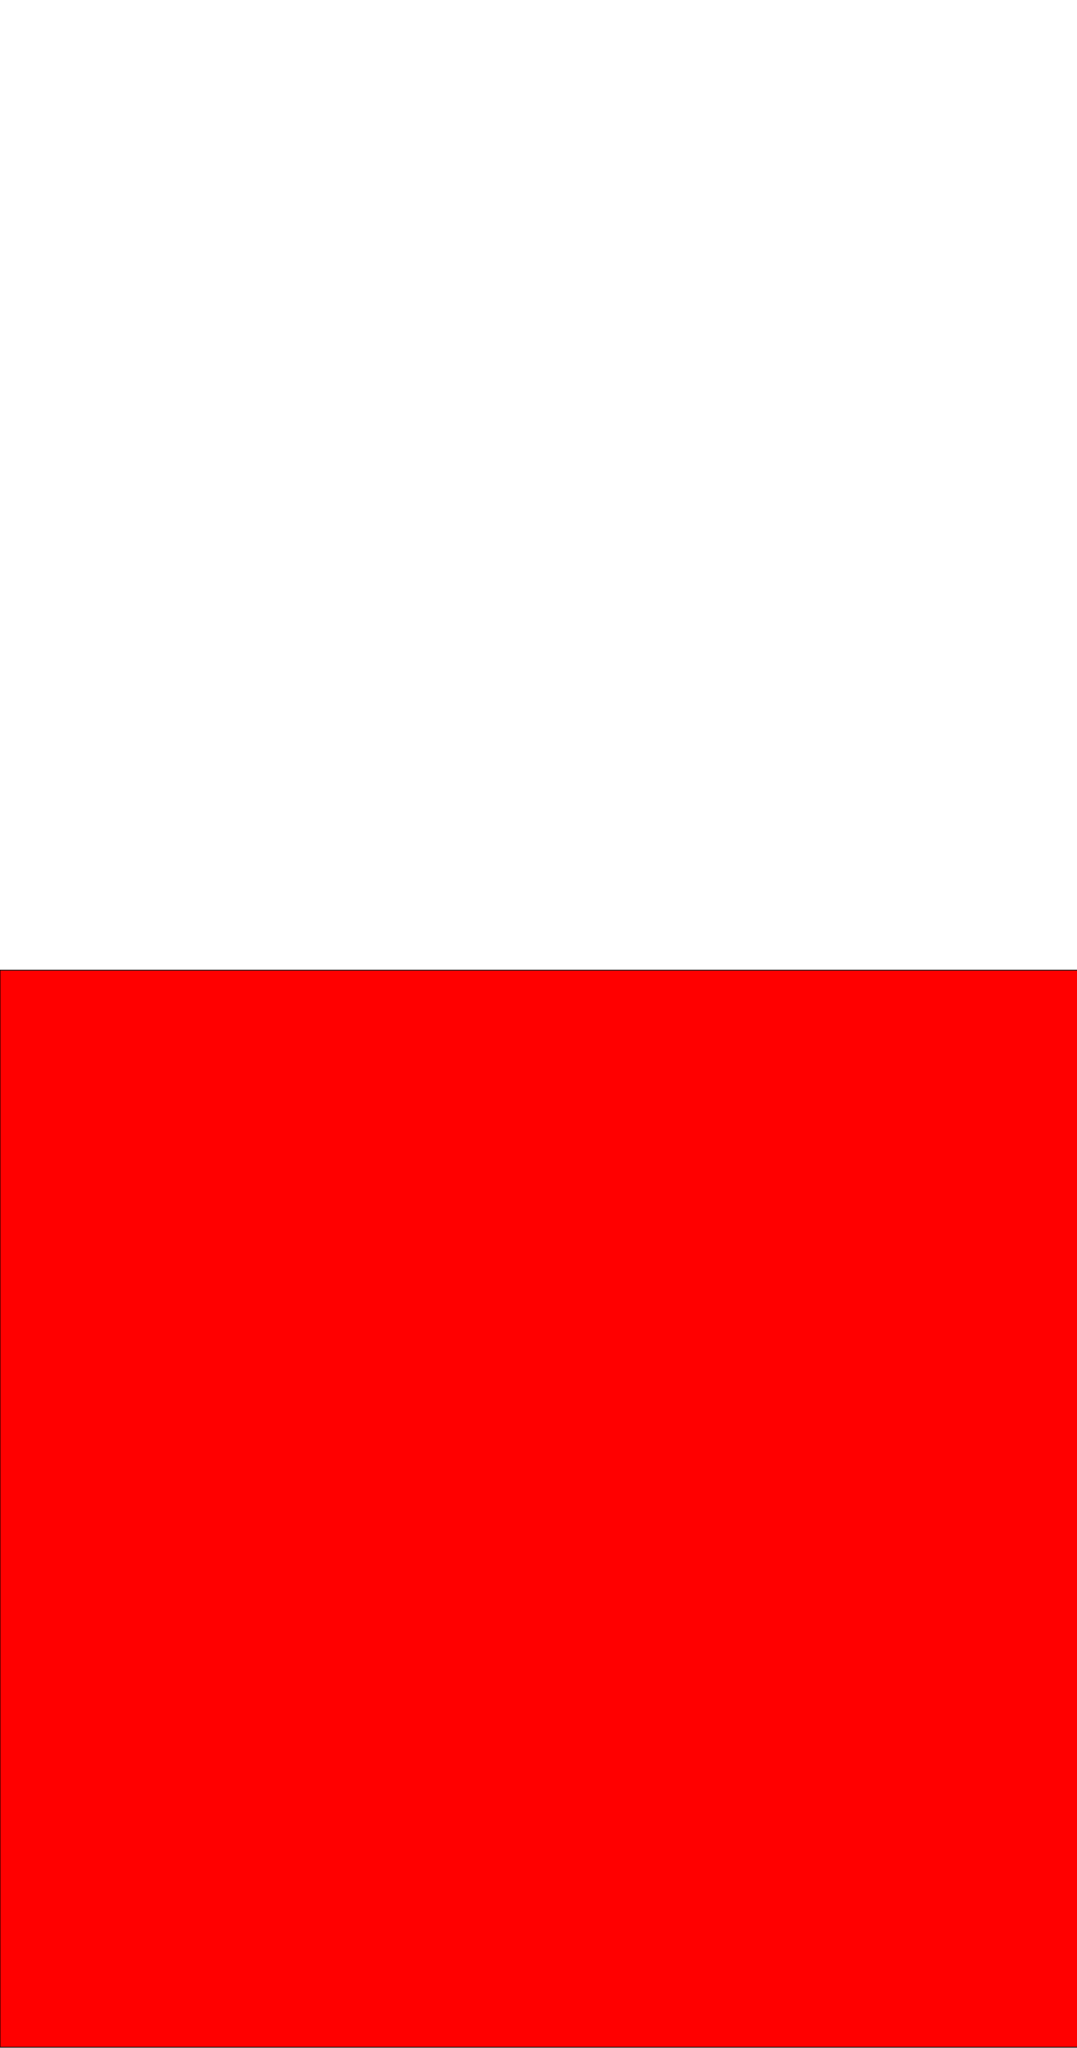

In [39]:
flag